# Project 4 Working Notebook
# Fake News Machine Learning

In [1]:
# Project 4 Working Notebook
# Fake News Machine Learning

 # Import our dependencies
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
# import tensorflow as tf



In [2]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column

df_news = pd.read_csv(
    Path("../Resources/big_news_output.csv")
)

# Review the DataFrame
df_news.head()

,Unnamed: 0,title,text,label
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Get infor on dataframe
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51233 entries, 0 to 51232
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51233 non-null  int64 
 1   title       51233 non-null  object
 2   text        51233 non-null  object
 3   label       51233 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [4]:
# Available stats on dataframe
df_news.describe()

,Unnamed: 0
count,51233.000000
mean,25616.000000
std,14789.837508
min,0.000000
25%,12808.000000
50%,25616.000000
75%,38424.000000
max,51232.000000


In [5]:
# Calculate how many unique values in first column
df_news['Unnamed: 0'].nunique()

51233

In [6]:
# Count number of fake and real news articles
fake_count = pd.DataFrame(df_news['label'].value_counts())
fake_count

,label
FAKE,26645
REAL,24588


In [7]:
# Rename the first column to id
df_news.rename(columns={'Unnamed: 0': 'id'})

,id,title,text,label
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
51228,51228,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,REAL
51229,51229,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",REAL
51230,51230,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,REAL
51231,51231,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,REAL


<BarContainer object of 2 artists>

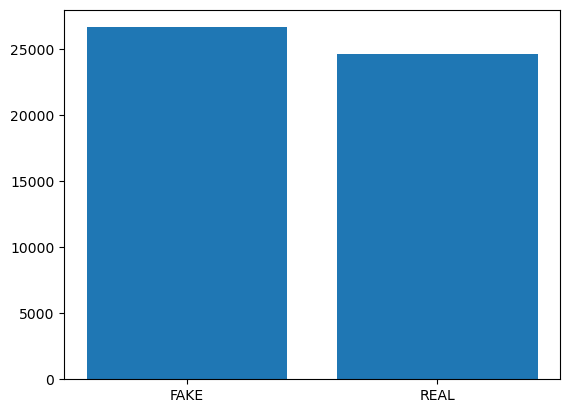

In [8]:
plt.bar(fake_count.index, fake_count['label'])